# 4.4 Zero-order hold

## 4.4.1 Creating a continuous time signal from discrete time samples

In the previous section, we created a discrete time model of a continuous time system  
to get the discrete time transfer function, $H(z)$  
  
The model was found by using an approximation to the relationship between the   
continuous time frequency, $s$, and the discrete time frequency, $z$  
  
$$z=e^{sT}\approx1+sT\approx\frac{1}{1-sT}\approx\frac{1+\frac{sT}{2}}{1-\frac{sT}{2}}$$  
In this section, we are going to look at creating a model of a continuous time system,  
by actually creating a continuous time wave  
  
We learned earlier that a piece of hardware called the digital to analog converter (DAC)  
can recreate a continuous time wave from a set of discrete time samples  
  
There are many theoretical ways to construct a wave from a set of sampled points  
One is called zero-order hold and another is called first-order hold  
The figure belows shows how the two methods will construct a continuous time wave  
from a discrete set of points  
  
All modern DACs use the zero-order hold technique  
You should realize that the DAC is taking liberty to fill in  
information between samples however it wants to  
It is not recreating the exact continuous time wave from the wikipedia figure  
That information is lost when the wave is sampled  
  
Therefore, the DAC will have an impact on the frequency domain information  
contained in the recreated wave  
[zero-order hold](https://en.wikipedia.org/wiki/Zero-order_hold)
![image1!](./images_s4/image_4_4_1.png)  

## 4.4.2 The transfer function of the DAC

The figure below shows a DAC with all of the relevent associated signals  
The figure has a lot of information, showing both the discrete time and continuous time sides of the DAC  
  
It also shows how to go back and forth between the time or indexed domain  
and the frequency domain using the $\mathcal{Z}$, $\mathcal{Z}^{-1}$, $\mathcal{L}$, or $\mathcal{L}^{-1}$ transforms  
  
Finally, it shows the point where the zero-order hold is introduced into the system,  
which fills in the missing information between the discrete samples to create a continuous time wave  
![image2!](./images_s4/image_4_4_2.png)  
The transfer function is a bit unusual,  
because it relates a continuous time sample to a discrete time sample  

After considerable math describing the zero-order hold,  
the transfer function is shown to be  
  
$$X(s)=X(z)\left(\frac{1}{s}\right)\left(1-e^{-sT}\right)$$  

## 4.4.3 The transfer function of a sampled system

Consider the sampled system below  
The system takes a continuous time signal at its input and produces a continuous time signal at its output,  
so it has a transfer function $H(s)=\frac{Y(s)}{X(s)}$  
![image5!](./images_s4/image_4_4_5.png)  
The analog to digital converter, simply samples the signal, $x(t)$,  
it has no impact on the frequency response  
  
In fact, the frequency domain signal, $X(z)$ is often called the starred input, $X(z)=\left.X^*(s)\right|_{s=\frac{ln(z)}{T}}$  
which is just the Laplace transform of the sampled input signal, when $s=\frac{ln(z)}{T}$  
  
Because the DAC holds a sample for the entire sample period, while the ADC samples instantly,  
the output signal must be divided by the sampling period, to normailze the frequency response to a gain of one  
  
Therefore, the transfer function of the sampled system, as derived above, is  
  
$$H(s)\equiv\frac{Y(s)}{X(s)}=\frac{(1-e^{-sT})}{sT}$$  
  
The zero-order hold transfer function is plotted as a function of input frequency in the code cell below  
  
Up until 500Hz, the output signal comes out at the same frequency as the input,  
however, beyond 500Hz, the signals are aliased to lower frequencies,  
so the figure should really be folded,  
with input frequencies from 500Hz to 1000Hz folded back from 500Hz down to 0Hz, and so on...  

Text(0.5, 1.0, 'The zero-order hold transfer function')

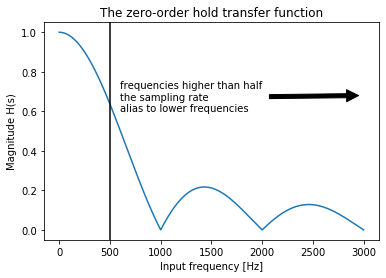

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(1, 3000, 1000)
w = 2*np.pi*f
s = 1j*w
T = 0.001
H_s = (1-np.exp(-s*T))/(s*T)
mag = np.abs(H_s)
phase = np.angle(H_s, deg=True)

plt.plot(f, mag)
plt.axvline(x=500, color='k')
plt.annotate('frequencies higher than half\nthe sampling rate\nalias to lower frequencies', 
             xy=(3000,0.68), xytext=(600, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Input frequency [Hz]')
plt.ylabel('Magnitude H(s)')
plt.title('The zero-order hold transfer function')

Consider a 100Hz wave sampled at 1000 samples/second  
The code cell below plots the the input and output waves; x(t) and y(t)  
The zero-order hold, transfer function, is describing the relation between these two waves  

Text(0.5, 1.0, 'The continuous time signals into and out of a sampled system')

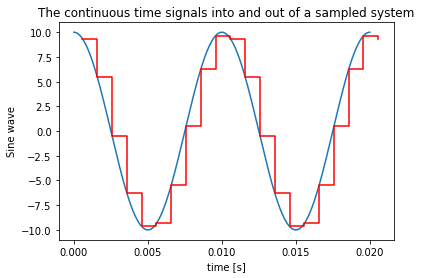

In [2]:
t = np.linspace(0, 0.02, 5000)
f_t = 5*np.exp(2*np.pi*100j*t) + 5*np.exp(-2*np.pi*100j*t)
sample_times =  np.arange(0.000577, 0.021, 0.001) # 1000 samples per second
samples = 5*np.exp(2*np.pi*100j*sample_times) + 5*np.exp(-2*np.pi*100j*sample_times)

plt.plot(t, f_t.real)
plt.step(sample_times, samples.real, where='post', color='r')
plt.xlabel('time [s]')
plt.ylabel('Sine wave')
plt.title('The continuous time signals into and out of a sampled system')

For the wave above, $s=j2\pi100$ and T=0.001[s]  
This gives us $H(s)=\frac{(1-e^{-sT})}{sT}=0.935-0.304j$,  
which is a magnitude of 0.935 and an angle of $-18^\circ$  
  
The "boxiness" caused by the zero-order hold reduces the magnitude slightly from 1  
The reduction in magnitude has to do with how the samples align themselves with the input sine wave  
Although the alignment between the sampler and the input sine wave will drift,  
the example above shows the average alignment, causing the slight loss in signal  
The average value of one "hump" of a sine wave is 0.637, which is the gain of the transfer function  
at half the sampling rate when there are only 2 samples ("boxes") per sine wave  
  
The phase shift of $-18^\circ$ (shift right) can clearly be seen  

You can also see the transfer function has a zero at a frequency equal to the sampling rate,  
as well as a zero at all integer multiples of the sampling rate  
  
It is easy to see in the figure below, why no sine wave comes out,  
when you put in a sine wave with a frequency equal to the sampling rate  
![image6!](./images_s4/image_4_4_6.png)  

## 4.4.4 Zero-order hold as a model for continuous time transfer functions

When we model continuous time transfer functions, we try to find a discrete time transfer function  
that has the same properties as the continuous time transfer function  
  
Consider the sampled system shown below  
![image7!](./images_s4/image_4_4_7.png)  
Using the relation $z=e^{sT}$, the zero-order hold transfer function can be written as  
  
$$zero\;order\;hold(s)=\frac{1-e^{sT}}{s}=(1-z^{-1})\left(\frac{1}{s}\right)$$  
with this equation and considerable math that we won't show,  
we can write the transfer function of the sampling system above  
  
$$H(z)\equiv\frac{Y(z)}{X(z)}=(1-z^{-1})\mathcal{Z}\left(\mathcal{L}^{-1}\left\{\frac{H(s)}{s}\right\}\right)$$  
Of course, $H(s)$ could be a real world continuous time system,  
but for modeling, $H(s)$ is just conceptual to allow for the description of a model  

## 4.4.5 Converting an example system using the zero-order hold

Consider the example transfer function we used previously to test  
the Forward Euler, Backward Euler, and Bilinear methods  
The system we want to model is  
  
$$H(s)=\frac{10}{s+10}$$  
put this in the transfer function  of the zero-order hold sampled system  
  
$$H(z)\equiv\frac{y(z)}{x(z)}=(1-z^{-1})\mathcal{Z}\left(\mathcal{L}^{-1}\left\{\frac{10}{s(s+10)}\right\}\right)$$  
Take the inverse Laplace transform  
  
$$H(z)=(1-z^{-1})\mathcal{Z}\left(1-e^{-10t}\right)$$  
You have to account for sampling the system with the ADC, so $t=kT$  
we used a sampling rate of 20 samples/sec, or $T=0.05$[s]  
in this case, $e^{-10T}=e^{-0.5}=0.61$
  
$$H(z)=(1-z^{-1})\mathcal{Z}\left(u(kT)-e^{-10kT}\right)=(1-z^{-1})\mathcal{Z}\left(u[k]-0.61^{k}\right)$$  
We can look the terms up in the z-transform table to find the z-transform  
  
$$H(z)=(1-z^{-1})\left(\frac{z}{z-1}-\frac{z}{z-0.61}\right)$$  
finding the common denominator and multiplying everything out, yields  
  
$$H(z)=\frac{0.39}{z-0.61}$$  
The code cell below uses the [to_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html#scipy.signal.cont2discrete) method to find the zero-order hold model  

In [3]:
import scipy.signal as sig

# enter the continuous time transfer function and create a continuous time lti system
num = [10]
den = [1, 10]
H_s = sig.lti(num, den)

# you must specify a sample period
dt = 0.05

# sometimes you will get a badly conditioned coefficients warning from Scipy
# its just a warning not an error
H_z_zoh = H_s.to_discrete(dt=dt, method='zoh')
print(H_z_zoh)

TransferFunctionDiscrete(
array([0.39346934]),
array([ 1.        , -0.60653066]),
dt: 0.05
)


C:\Apps-SU\Anaconda\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


## 4.4.6 Comparing forward Euler, backward Euler, bilinear, and zero-order hold models

In the following code cells, the forward Euler, backward Euler, bilinear, and zero-order hold models  
will be compared, by showing the results of the step, impulse, and Bode plot methods  
  
We have used all of these standard Scipy methods with continuous time systems throughout this course  
The discrete time methods are very similar and work equally well for discrete time systems  

### 4.4.6.1 Discrete time step response

The step response is quite straight forward  
The code cell below creates a dlti system for each of the different approximations  
and then plots the step responses  
comparing them with the step response of the continuous time system  
[Discrete step response](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html#scipy.signal.dstep)

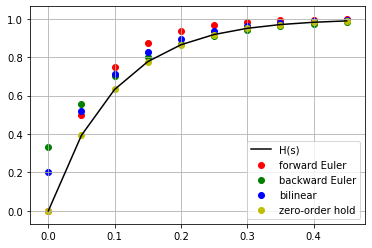

In [4]:
# create the discrete time transfer functions for comparison
H_z_fe = H_s.to_discrete(dt=dt, method='euler')
H_z_be = H_s.to_discrete(dt=dt, method='backward_diff')
H_z_b = H_s.to_discrete(dt=dt, method='bilinear')
H_z_zoh = H_s.to_discrete(dt=dt, method='zoh')

# create a time array
t = np.arange(0, 0.5, 0.05)

# find the continuous time response
t, y_s = H_s.step(T=t)

# find the discrete time step respose of each system
t, y_fe = H_z_fe.step(t=t)
t, y_be = H_z_be.step(t=t)
t, y_b = H_z_b.step(t=t)
t, y_zoh = H_z_zoh.step(t=t)

# plot the step responses
plt.plot(t, y_s, color='k')
plt.scatter(t, np.squeeze(y_fe), color='r')
plt.scatter(t, np.squeeze(y_be), color='g')
plt.scatter(t, np.squeeze(y_b), color='b')
plt.scatter(t, np.squeeze(y_zoh), color='y')

plt.legend(['H(s)', 'forward Euler', 'backward Euler', 'bilinear', 'zero-order hold'])
plt.grid()
# the zero-order hold response land right on top of the continuous time reponse

### 4.4.6.2 Discrete time impulse response

The discrete impulse response is a little more complicated to understand  
Because the system is described in discrete time, the impulse cannot be infintely tall,  
because it cannot have zero width  
  
The discrete time impulse is actually a pulse of height 1, lasting for one time step  
The continuous time impulse is infinitely tall, with a width of zero time,  
but has an integral (area) equal to 1  
  
In effect, the area of the discrete time impulse is the sample period, $area=1\times T$, and in our example $T=0.05$  
  
So our discrete time impulse can only drive the system with a pulse of area $0.05$,  
while the continuous time unit impulse drives the system with an impulse of area 1,  
20 times greater than the discrete time input  
  
The unit impulse response is the inverse Laplace transform of the transfer function  
  
$$\mathcal{L}^{-1}\left\{\frac{10}{s+10}\right\}=10e^{-10t}$$  
If we divide this response by 20, you get  
  
$$comparable\;response=0.5e^{-10t}$$  
The code cell below, plots the various impulse responses, including the comparable response  
If we scale the figure to actually see the continuous time response,  
we will not see what is happening with the discrete time responses  
You can see in the figure, that all discrete time responses, except the backward Euler are delayed by 1 time unit   
[Discrete impulse response](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dimpulse.html#scipy.signal.dimpulse)

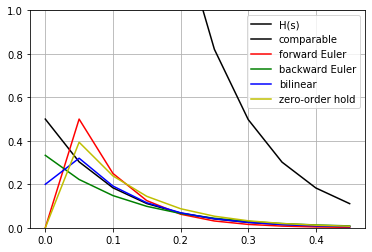

In [5]:
# find the continuous time response and the comparable response
t, y_s = H_s.impulse(T=t)
t, y_comp_s = sig.lti([0.5], [1, 10]).impulse(T=t)

# find the discrete time impulse respose of each system
t, y_fe = H_z_fe.impulse(t=t)
t, y_be = H_z_be.impulse(t=t)
t, y_b = H_z_b.impulse(t=t)
t, y_zoh = H_z_zoh.impulse(t=t)

# plot the impulse responses
plt.plot(t, y_s, color='k')
plt.plot(t, y_comp_s, color='k')
plt.plot(t, np.squeeze(y_fe), color='r')
plt.plot(t, np.squeeze(y_be), color='g')
plt.plot(t, np.squeeze(y_b), color='b')
plt.plot(t, np.squeeze(y_zoh), color='y')
plt.ylim([0, 1])

plt.legend(['H(s)', 'comparable', 'forward Euler', 'backward Euler', 'bilinear', 'zero-order hold'])
plt.grid()
# the continuous time reponse starts at a value of 10!
# you can't see the start because of how the y-axis is scaled

### 4.4.6.3 Discrete time Bode plot

Before we look at the Bode plots,  
let's remind ourselves how the Bode plot relates to the s and z-planes  
  
The Bode plot shows us the gain (magnitude and phase) of the transfer function for steady state sine waves  
On the s-plane, continuous time sine waves are described by complex conjugate imaginary values of s  
For the continuous time Bode plot, we only have to concern ourselves with the positive imaginary axis  
and the Bode plot is a graph of H(s) on the y-axis, versus the positive imaginary axis of the s-plane along the x-axis  
  
The figure below shows the values of s used for the x-axis of the continuous time Bode plot  
and the values of z used for the x-axis of the discrete time Bode plot  
![image8!](./images_s4/image_4_4_8.png)  

Discrete time Bode plots are measured up to half the sampling rate  
Our example system used a sampling rate of 20 samples/sec,  
therefore the Bode plots are measured up to the frequency of 10Hz, or 62.8 [rad/s]  
  
The code cell below creates the Bode plots for the various systems  
[Discrete Bode plot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dlti.bode.html#scipy.signal.dlti.bode)

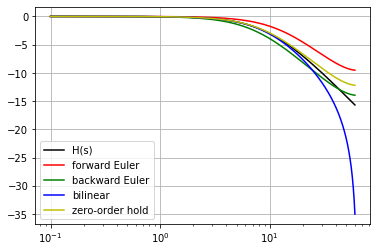

In [6]:
# create a frequency array for the continuous time system
w_s = np.linspace(0.1, 60, 1000)
# create a frequency array for the discrete time systems
w_z = np.linspace(0.005, 3, 1000)

w_s, mag_s, phase = H_s.bode(w=w_s)
w, mag_fe, phase = H_z_fe.bode(w=w_z)
w, mag_be, phase = H_z_be.bode(w=w_z)
w, mag_b, phase = H_z_b.bode(w=w_z)
w, mag_zoh, phase = H_z_zoh.bode(w=w_z)

plt.plot(w_s, mag_s, color='k')
plt.plot(w, mag_fe, color='r')
plt.plot(w, mag_be, color='g')
plt.plot(w, mag_b, color='b')
plt.plot(w, mag_zoh, color='y')

plt.xscale('log')
plt.legend(['H(s)', 'forward Euler', 'backward Euler', 'bilinear', 'zero-order hold'])
plt.grid()